# Jupyter Notebook Project

## 1 - Summary of Selected Project Topic
<br>

The project topic that I have chosen revolve around COVID-19 and GIS application. This topic has affected me in a numerous ways and was inspired by [this post](https://towardsdatascience.com/visualizing-the-coronavirus-pandemic-with-choropleth-maps-7f30fccaecf5). 

The author illustrated and provided examples of how to display COVID-19 using choropleth maps for the entire world using python plotly, numpy, pandas, and other modules. 

This final project is aimed to analyze COVID-19 data for the United States only and provide visualizations. Specifically,
1. A map showing the total confirmed cases in USA,
2. A bar graph showing Positive and negative percentages and total number of deaths, and
3. A gridmap showing trends of positive increases since May 1st, 2020. 

This exercise will use the following modules: numpy, pandas, matplotlib, urllib, requests, bs4, seaborn, and plotly. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from matplotlib.ticker import MultipleLocator
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import requests
from bs4 import BeautifulSoup
import seaborn as sns


# load dataset and find latest COVID-19 results
df = pd.read_json("https://covidtracking.com/api/v1/states/daily.json")
df = df.sort_values(by=["date"], ascending=False)
lastDate = df["date"][0]
df_latest = df.loc[df["date"] == lastDate]

df = df.rename(columns={"dateChecked": "dateLong",
                        "totalTestResults": "Total Cases"})

fig = go.Figure(data=go.Choropleth(
    locations=df_latest['state'],
    locationmode='USA-states',
    z=df_latest['positive'],
    colorscale='darkmint',
    marker_line_color='black',
    marker_line_width=0.5,
    ))
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(
    title_text='Total Confirmed Cases in USA as of {}'.format(lastDate),
    title_x=0.5,
    geo=dict(projection_type='albers usa'),
    height=500,
    width=700
)

fig.show()

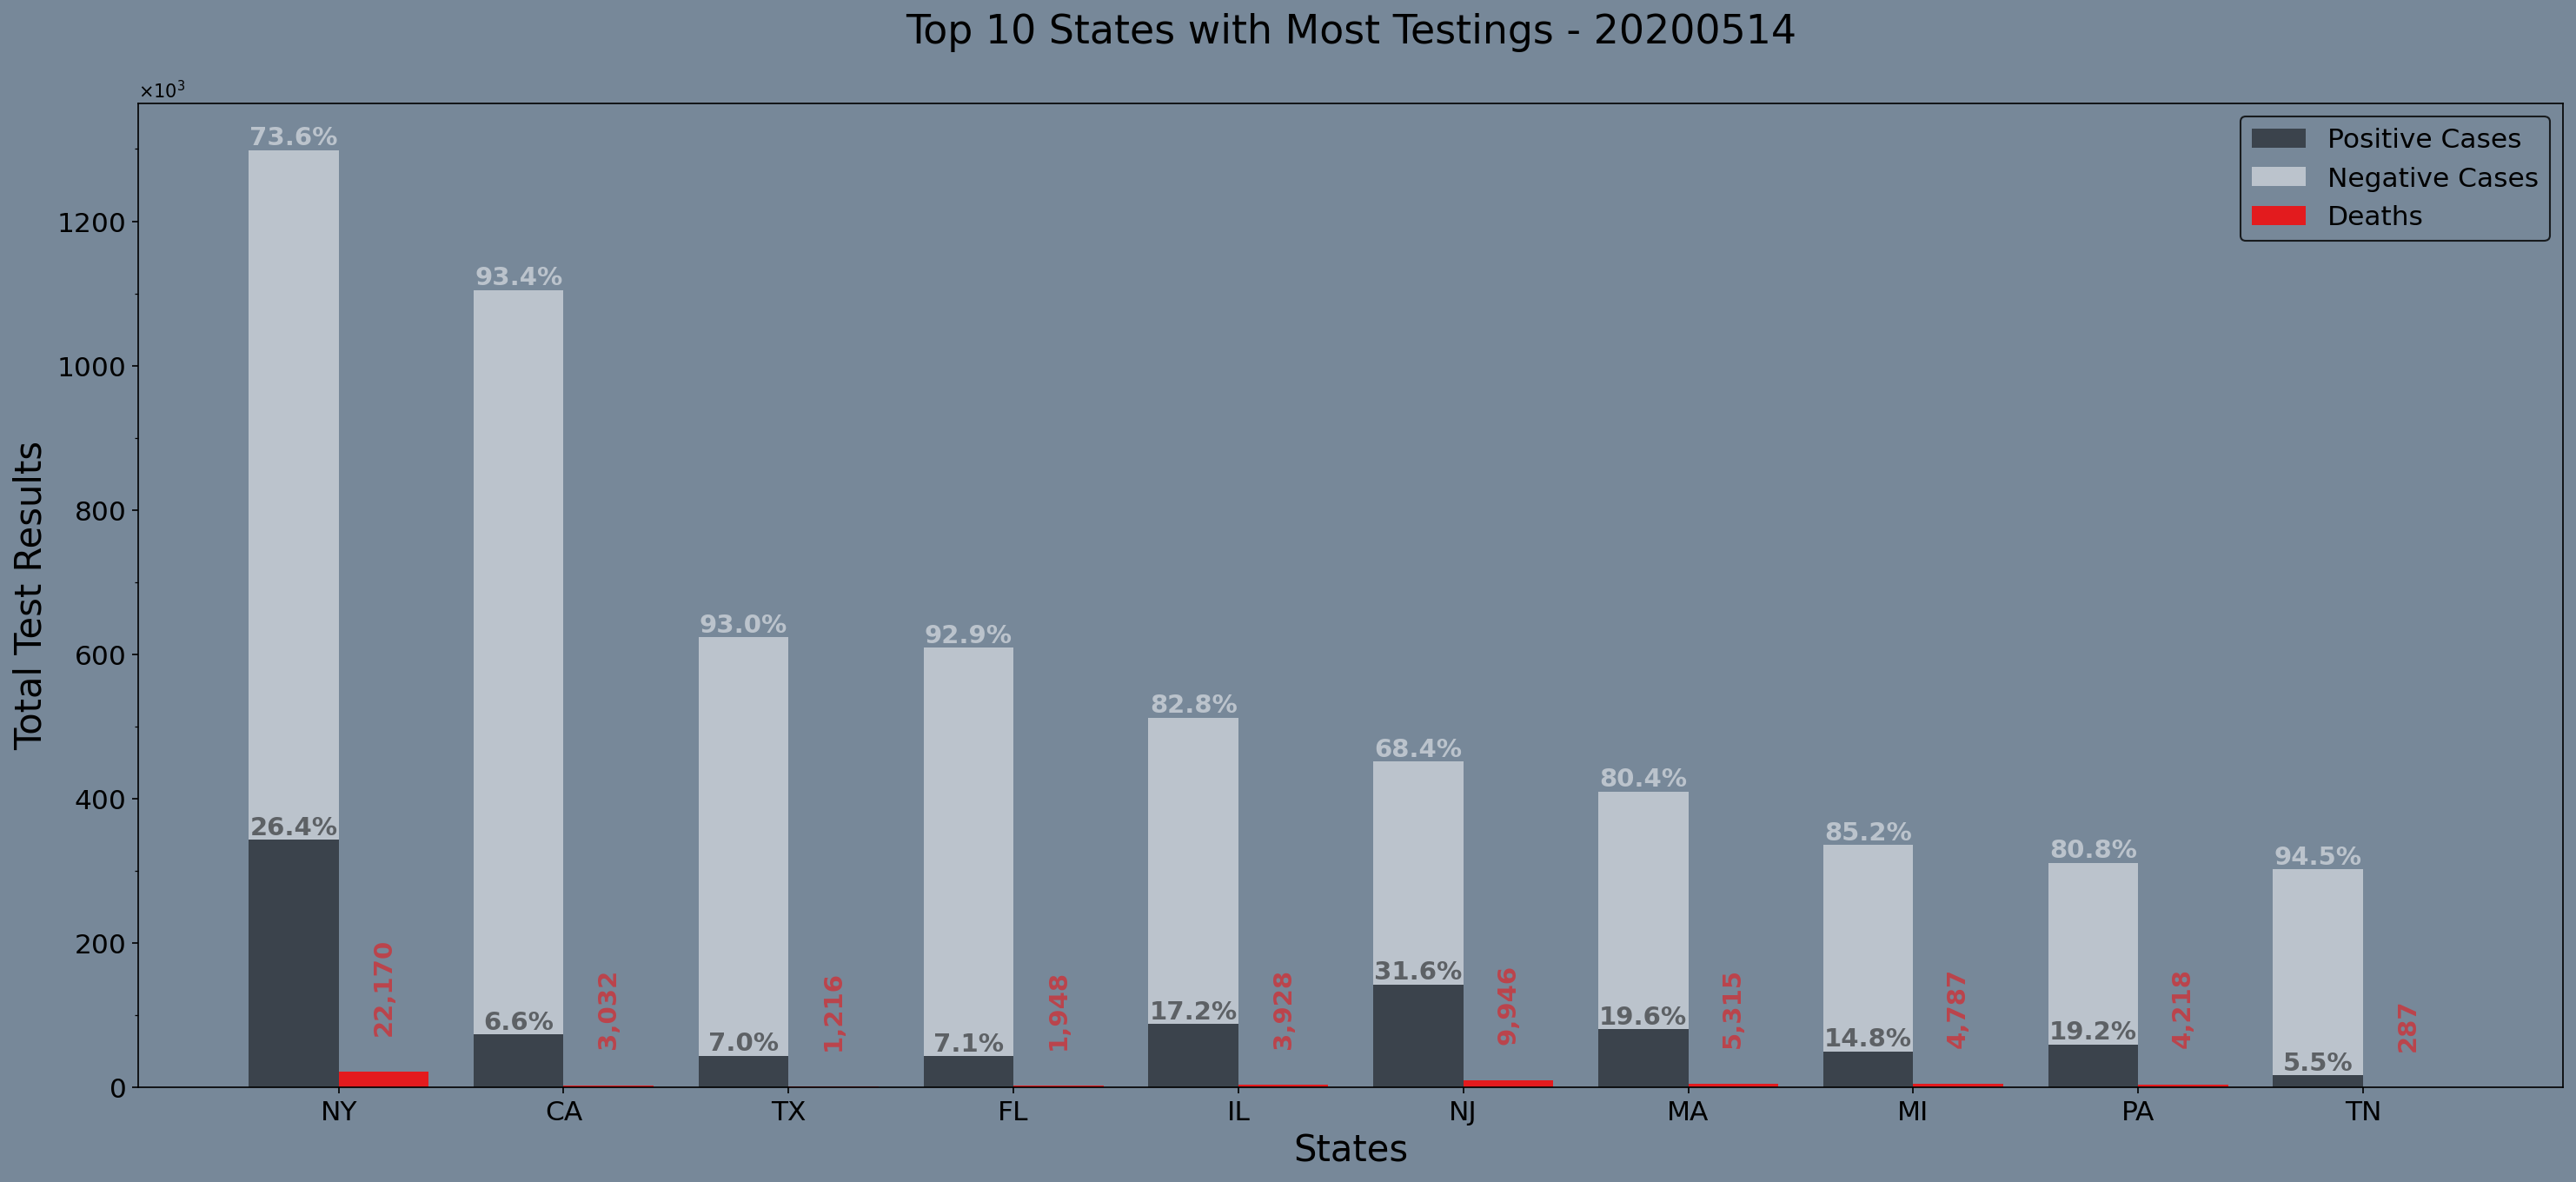

In [2]:
#sort and find top 10 states
df_latest = df_latest.sort_values(by="totalTestResults", ascending=False)[0:10]

#plot variables
x = np.arange(10)
width = 0.4
x_labels = df_latest["state"].tolist()

#initial figure
fig, ax = plt.subplots(figsize=(24, 10), dpi=150,
                       facecolor="lightslategray", edgecolor='k')

# bar graphs for positive, negative, and deaths
pos = ax.bar(x-width/2.,
             df_latest["positive"],
             width,
             color="black",
             alpha=0.5,
             label="Positive Cases"
             )

neg = ax.bar(x-width/2.,
             df_latest["negative"],
             width,
             color="white",
             alpha=0.5,
             bottom=df_latest["positive"],
             label="Negative Cases"
             )
death = ax.bar(x+width/2.,
               df_latest["death"],
               width,
               color="red",
               alpha=0.8,
               label="Deaths"
               )

# adding labels for stacked bar
def addValuesStacked(pos, neg):
    for r1, r2 in zip(pos, neg):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2.,
                 h1,
                 "{:.1%}".format(h1/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="black",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2.,
                 h1 + h2,
                 "{:.1%}".format(h2/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="white",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")


def addValuesBar(bar):
    for rect in bar:
        h3 = rect.get_height()
        ax.annotate('{:,}'.format(int(h3)),
                    xy=(rect.get_x()+rect.get_width()/2., h3),
                    xytext=(0, 20),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    color='red',
                    rotation=90,
                    alpha=0.5,
                    fontsize=14,
                    fontweight="bold"
                    )


# figure adjustment
ax.set_ylabel('Total Test Results')
ax.set_xlabel('States')
ax.set_title('Top 10 States with Most Testings - {}'.format(lastDate),
             fontsize=22,
             y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
plt.ticklabel_format(style='sci', axis='y', scilimits=(3, 3), useMathText=True)
ax.yaxis.set_minor_locator(MultipleLocator(100000))

# add value labels on bar graphs
addValuesStacked(pos, neg)
addValuesBar(death)

# adjust axes label sizes
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(20)

# colors and yaxis labels
plt.bgcolor = "black"
ax.set_facecolor('lightslategray')
plt.legend(loc="upper right", fontsize=15,
           facecolor="lightslategray", edgecolor="k")


plt.show()

In [3]:
# get population data
URL = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
fileName = 'pop10-19.csv'

urlretrieve(URL, fileName)








('pop10-19.csv', <http.client.HTTPMessage at 0x1060ee278>)

In [4]:
df_pop = pd.read_csv(fileName, encoding='latin-1')

df_popSum = df_pop.loc[df_pop["STNAME"] == df_pop["CTYNAME"],["STNAME","POPESTIMATE2019"]]
df_popSumTop = df_popSum.groupby("STNAME").agg({"POPESTIMATE2019": "sum"})
df_popSumTop = df_popSumTop.sort_values(by="POPESTIMATE2019",ascending = False)[0:12].reset_index()

# popSumTop_list = df_popSumTop.iloc[:, df_popSumTop.columns.get_level_values(0)=='STNAME']
popSumTop_list = df_popSumTop["STNAME"].tolist()

# popSumTop_list = popSumTop_list.reset_index()

# #total US population in 2019
# totalUSPop = df_popSum.sum()

In [5]:
popSumTop_list

['California',
 'Texas',
 'Florida',
 'New York',
 'Pennsylvania',
 'Illinois',
 'Ohio',
 'Georgia',
 'North Carolina',
 'Michigan',
 'New Jersey',
 'Virginia']

In [6]:


#Find a table to convert State names to State abbreviation
url = "https://www.50states.com/abbreviations.htm"

r = requests.get(url)
content = r.text

soup = BeautifulSoup(content,'html.parser')

table = soup.find_all('table',class_="spaced stripedRows abbreviations-table table table-hover")
table = table[0]

USAbb_list = list()
USAbb_dict = dict()

for row in table.find_all('tr'):
    for cell in row.find_all('td'):
        USAbb_list.append(cell.text)

for i in range(len(USAbb_list)):
    if i % 2 == 0:
        USAbb_dict[USAbb_list[i+1]] = USAbb_list[i]
        
#map this dict to df
df['STATENAME'] = df['state'].map(USAbb_dict)


In [7]:
df_top = df[df["STATENAME"].isin(popSumTop_list)]
df_top = df_top[["date", "state", "positiveIncrease"]]
df_top = df_top.rename(columns={"positiveIncrease": "Positive Increase"})
df_top["date"]=df_top["date"].astype(str)
df_top["Time"]= df_top["date"].str[4:6] + "-" + df_top["date"].str[6:]
df_top

,date,state,Positive Increase,Time
34,20200514,NJ,1144.0,05-14
37,20200514,NY,2390.0,05-14
38,20200514,OH,636.0,05-14
41,20200514,PA,938.0,05-14
47,20200514,TX,1448.0,05-14
...,...,...,...,...
3876,20200304,FL,NaN,03-04
3875,20200304,CA,NaN,03-04
3889,20200303,MI,16.0,03-03
3892,20200302,MI,9.0,03-02


In [8]:
df_top = df_top.loc[df_top["Time"].str[:2] == "05"]
df_top = df_top.sort_values(by="date",ascending=True)
df_top

,date,state,Positive Increase,Time
744,20200501,IL,3137.0,05-01
766,20200501,OH,716.0,05-01
765,20200501,NY,3942.0,05-01
758,20200501,NC,414.0,05-01
762,20200501,NJ,2538.0,05-01
...,...,...,...,...
11,20200514,GA,526.0,05-14
24,20200514,MI,1191.0,05-14
16,20200514,IL,3239.0,05-14
30,20200514,NC,691.0,05-14


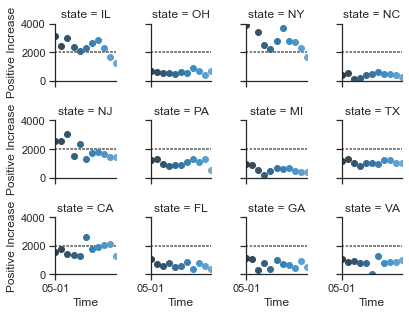

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df_top, col="state", hue="Time", palette="Blues_d",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=2000, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Time", "Positive Increase", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(1), yticks=[0, 2000, 4000],
         xlim=(0, 10), ylim=(0,4000))

# Adjust the arrangement of the plots
# grid.fig.tight_layout(w_pad=0)